# PCA con Inclusión Financiera alternativa

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# 1. Cargar los datos desde un archivo Excel
data = pd.read_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/PCA/Data IF base new.xlsx")
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%y')

# 2. Establecer datos, normalizar y pegar fecha
numeric_data = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')  # Convertir columnas numéricas

scaler = StandardScaler()
normalized = pd.DataFrame(
    scaler.fit_transform(numeric_data),  # Normalizar solo los valores
    columns=numeric_data.columns  # Mantener nombres de columnas
)

normalized.index = data['Fecha'].values
normalized.index.name = 'Fecha'
normalized

,DEBTORS,DEBTORS_POB,DEBTOR_HOGAR,DEBTOR_MICRO,CRED_HOGAR,CRED_MICRO,DEPO_CRED,OFIC,OFIC_POB,OFIC_GEO
Fecha,,,,,,,,,,
2001-03-31,-1.627806,-1.787111,2.067135,-2.869620,-2.754637,-0.677523,-1.046795,-1.436736,-1.464707,-1.436736
2001-06-30,-1.610266,-1.765620,1.245782,-2.339258,-2.876358,-0.597170,-1.051023,-1.409869,-1.431506,-1.409869
2001-09-30,-1.597141,-1.750859,1.200733,-2.278732,-2.863741,-0.649731,-1.075094,-1.406424,-1.431515,-1.406424
2001-12-31,-1.564044,-1.706892,1.156072,-1.999035,-2.727983,-0.549746,-1.071937,-1.386445,-1.408425,-1.386445
2002-03-31,-1.551102,-1.692453,0.998376,-1.828240,-2.665324,-0.521416,-1.100029,-1.390579,-1.418712,-1.390579
...,...,...,...,...,...,...,...,...,...,...
2021-09-30,1.160362,0.823177,-2.150742,0.735729,-0.040323,-0.975800,1.742306,0.880774,0.528717,0.880774
2021-12-31,1.227353,0.878760,-2.085898,0.860809,0.120158,-0.887399,1.740624,0.844950,0.482182,0.844950
2022-03-31,1.302639,0.946108,-2.039679,0.727830,0.433314,-0.890308,1.650815,0.829794,0.459099,0.829794


<Figure size 200x100 with 0 Axes>

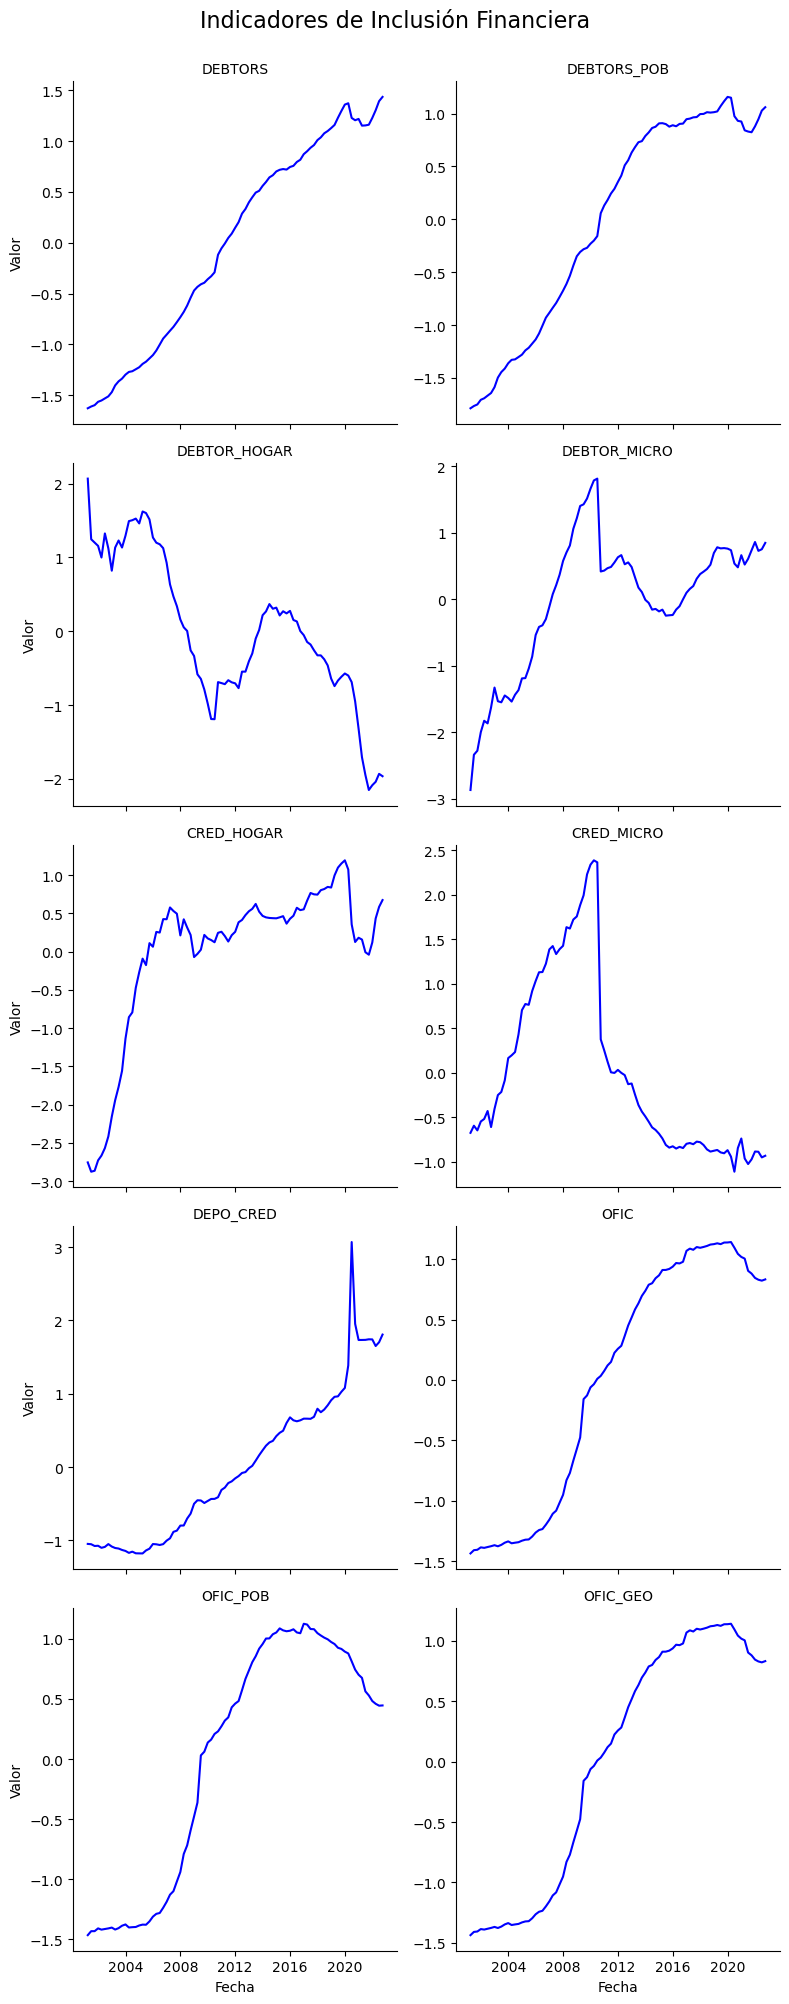

In [13]:
# Transforma el DataFrame a formato largo
normalized_long = normalized.reset_index().melt(id_vars='Fecha', var_name='Variable', value_name='Valor')

# Crear la figura con el gráfico
plt.figure(figsize=(2,1))
g1 = sns.FacetGrid(normalized_long, col='Variable', col_wrap=2, sharey=False, sharex=True, height=4)
g1.map(sns.lineplot, 'Fecha', 'Valor', color='blue')
g1.set_titles("{col_name}")
g1.set_axis_labels("Fecha", "Valor")
g1.fig.suptitle("Indicadores de Inclusión Financiera", fontsize=16, y=1)
g1.tight_layout()

# Mostrar el gráfico
plt.show()

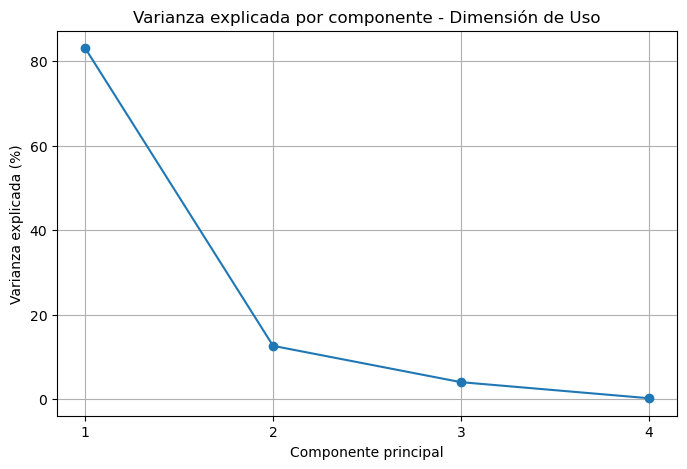

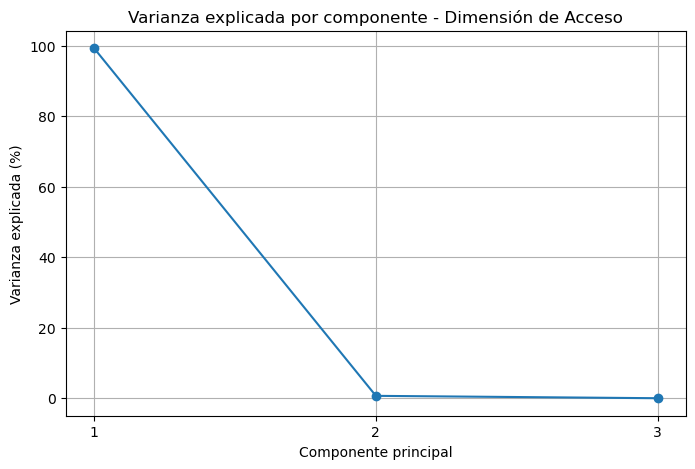

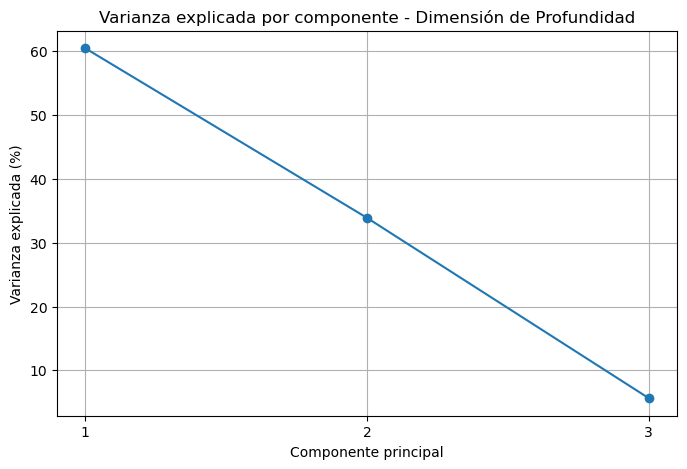

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Definir bloques
bloque_uso = ['DEBTORS', 'DEBTORS_POB', 'DEBTOR_HOGAR', 'DEBTOR_MICRO' ]
bloque_acceso = ['OFIC','OFIC_POB', 'OFIC_GEO']
bloque_profundidad = ['CRED_HOGAR','CRED_MICRO','DEPO_CRED']

# Crear función para aplicar PCA y graficar varianza explicada
def aplicar_pca_y_graficar(bloque, nombre_bloque):
    pca = PCA()
    componentes = pca.fit_transform(normalized[bloque])
    
    # Graficar varianza explicada
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_ * 100, marker='o')
    plt.title(f'Varianza explicada por componente - {nombre_bloque}')
    plt.xlabel('Componente principal')
    plt.ylabel('Varianza explicada (%)')
    plt.grid(True)
    plt.xticks(range(1, len(bloque) + 1))
    plt.show()
    
    return pca, componentes

# Aplicar PCA a cada bloque
pca_uso, componentes_uso = aplicar_pca_y_graficar(bloque_uso, "Dimensión de Uso")
pca_acceso, componentes_acceso = aplicar_pca_y_graficar(bloque_acceso, "Dimensión de Acceso")
pca_profundidad, componentes_profundidad = aplicar_pca_y_graficar(bloque_profundidad, "Dimensión de Profundidad")


In [17]:
def construir_indice_por_componentes(componentes, explained_variance_ratio, nombre_bloque, fechas):
    # Tomar solo los dos primeros componentes y su varianza explicada
    pcs = componentes[:, :2]
    var_ratio = explained_variance_ratio[:2]
    
    # Calcular el índice como el promedio ponderado por varianza explicada
    index_values = np.average(pcs, axis=1, weights=var_ratio)
    
    # Crear DataFrame con nombre adecuado y fechas como índice
    index_df = pd.DataFrame(index_values, columns=[nombre_bloque], index=fechas)
    return index_df

In [18]:
# Crear índices para cada bloque
USO_INDEX = construir_indice_por_componentes(componentes_uso, pca_uso.explained_variance_ratio_, 'USO_INDEX', normalized.index)
ACCESO_INDEX = construir_indice_por_componentes(componentes_acceso, pca_profundidad.explained_variance_ratio_, 'ACCESO_INDEX', normalized.index)
PROF_INDEX = construir_indice_por_componentes(componentes_profundidad, pca_profundidad.explained_variance_ratio_, 'PROF_INDEX', normalized.index)

In [22]:
# Unir los tres indicadores en un solo DataFrame
bloques_combinados = pd.concat([
    USO_INDEX,
    PROF_INDEX,
    ACCESO_INDEX
], axis=1)

bloques_combinados.columns = ['USO_INDEX', 'PROF_INDEX', 'ACCESO_INDEX']  # renombrar por claridad
print(bloques_combinados.head())

            USO_INDEX  PROF_INDEX  ACCESO_INDEX
Fecha                                          
2001-03-31  -3.723915   -1.965946     -1.615444
2001-06-30  -3.050323   -2.045187     -1.581386
2001-09-30  -2.988008   -2.043527     -1.579845
2001-12-31  -2.798978   -1.975722     -1.555577
2002-03-31  -2.628031   -1.956049     -1.564248


In [23]:
bloques_combinados.to_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/PCA/Data PCA IF 2.xlsx", index=True)

In [24]:
from sklearn.decomposition import PCA

# Aplicar PCA sobre los tres indicadores
pca_final = PCA()
componentes_final = pca_final.fit_transform(bloques_combinados)

In [29]:
pesos_pc1 = pca_final.components_[0]
print("Pesos del PC1:", pesos_pc1)

Pesos del PC1: [0.75054614 0.42738782 0.50400411]


In [30]:
findex_pc1 = componentes_final[:, 0]

# Ver la varianza explicada por cada componente
for i, var in enumerate(pca_final.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.4f} varianza explicada")

# Guardar en un DataFrame
FINDEX = pd.DataFrame(findex_pc1, columns=["FINDEX"], index=bloques_combinados.index)

df_findex_dim = pd.concat([bloques_combinados, FINDEX], axis=1)
print(df_findex_dim.head())

Componente 1: 0.9339 varianza explicada
Componente 2: 0.0441 varianza explicada
Componente 3: 0.0220 varianza explicada
            USO_INDEX  PROF_INDEX  ACCESO_INDEX    FINDEX
Fecha                                                    
2001-03-31  -3.723915   -1.965946     -1.615444 -4.449382
2001-06-30  -3.050323   -2.045187     -1.581386 -3.960521
2001-09-30  -2.988008   -2.043527     -1.579845 -3.912265
2001-12-31  -2.798978   -1.975722     -1.555577 -3.729179
2002-03-31  -2.628031   -1.956049     -1.564248 -3.596837


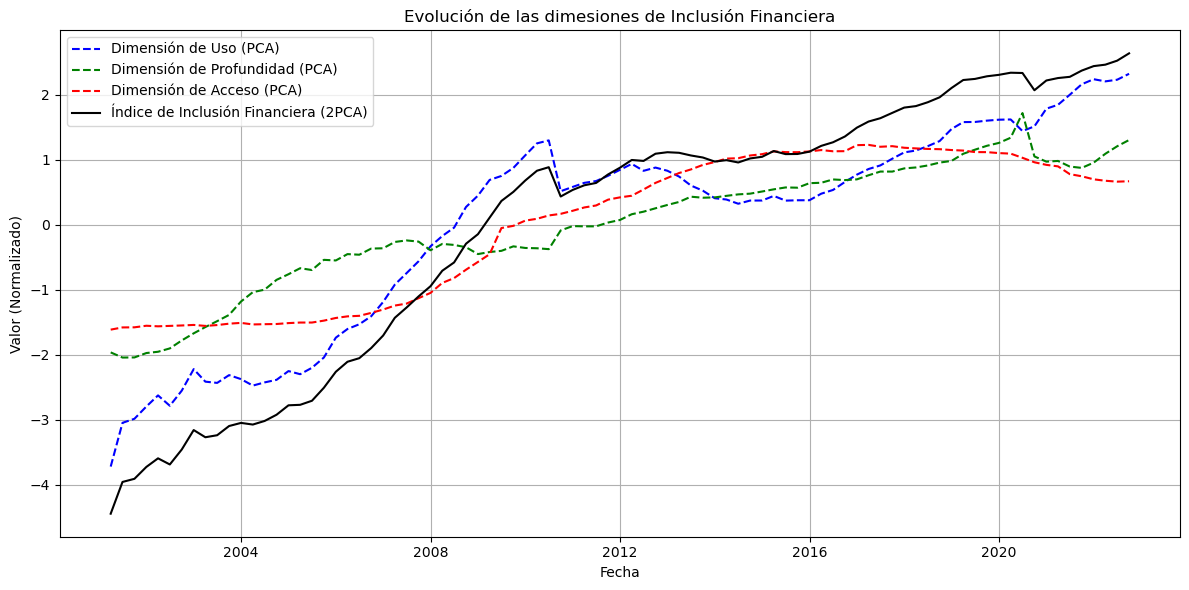

In [32]:
plt.figure(figsize=(12, 6))

# Graficar los dos índices
plt.plot(df_findex_dim.index, df_findex_dim['USO_INDEX'], label='Dimensión de Uso (PCA)', color='blue', linestyle='--')
plt.plot(df_findex_dim.index, df_findex_dim['PROF_INDEX'], label='Dimensión de Profundidad (PCA)', color='green', linestyle='--')
plt.plot(df_findex_dim.index, df_findex_dim['ACCESO_INDEX'], label='Dimensión de Acceso (PCA)', color='red', linestyle='--')
plt.plot(df_findex_dim.index, df_findex_dim['FINDEX'], label='Índice de Inclusión Financiera (2PCA)', color='black')

# Personalización del gráfico
plt.title('Evolución de las dimesiones de Inclusión Financiera')
plt.xlabel('Fecha')
plt.ylabel('Valor (Normalizado)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Guardar los datos en un archivo Excel
df_findex_dim.to_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/PCA/Data 2PCA IF new.xlsx", index=True)

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador
scaler = MinMaxScaler()

# Aplicar el escalado min-max a todas las columnas
df_findex_scaled = pd.DataFrame(
    scaler.fit_transform(df_findex_dim),
    columns=df_findex_dim.columns,
    index=df_findex_dim.index
)

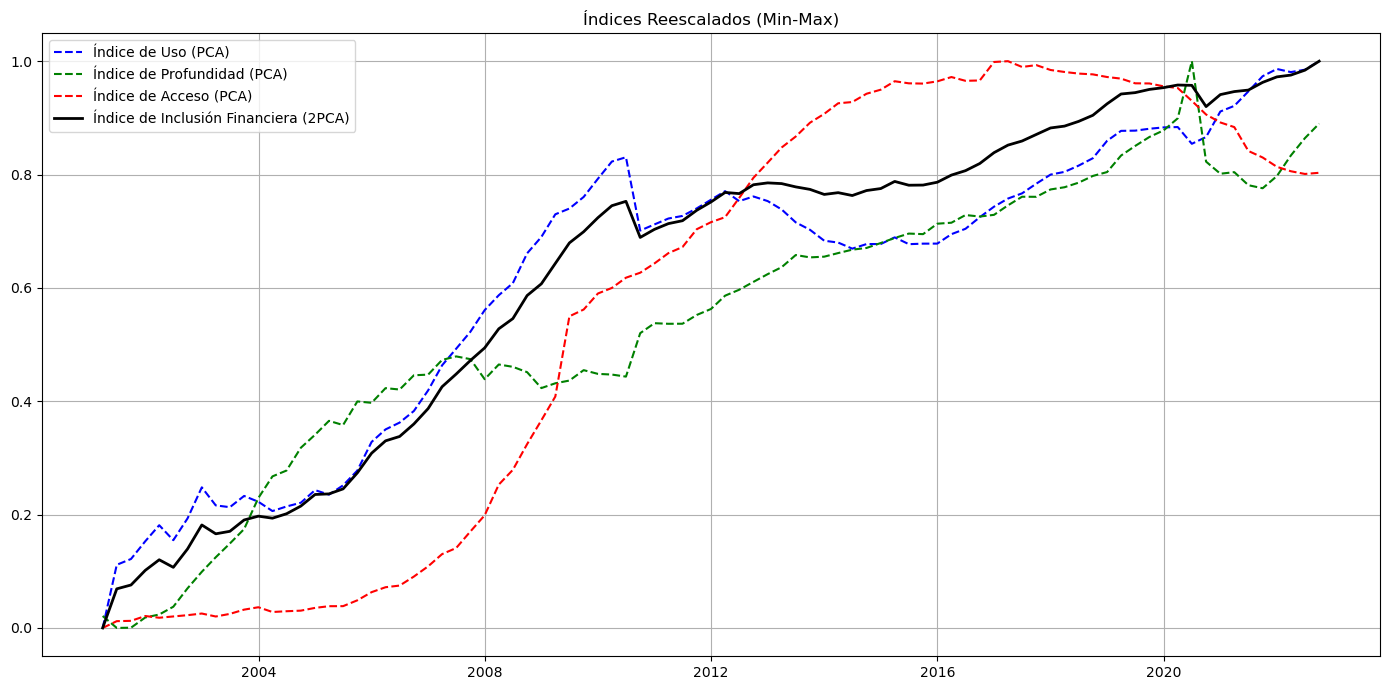

In [69]:
plt.figure(figsize=(14, 7))

# Graficar cada índice reescalado
plt.plot(df_findex_scaled.index, df_findex_scaled['USO_INDEX'], label='Índice de Uso (PCA)', color='blue', linestyle='--')
plt.plot(df_findex_scaled.index, df_findex_scaled['PROF_INDEX'], label='Índice de Profundidad (PCA)', color='green', linestyle='--')
plt.plot(df_findex_scaled.index, df_findex_scaled['ACCESO_INDEX'], label='Índice de Acceso (PCA)', color='red', linestyle='--')
plt.plot(df_findex_scaled.index, df_findex_scaled['FINDEX'], label='Índice de Inclusión Financiera (2PCA)', color='black', linewidth=2)

# Personalizar
plt.title('Índices Reescalados (Min-Max)')
# plt.xlabel('Fecha')
# plt.ylabel('Escala [0, 1]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
df_findex_scaled.to_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/PCA/Data nivel 2.xlsx", index=True)

# Filtro de Hamilton

In [6]:
# ---------- Función del filtro de Hamilton ----------
def hamilton_filter(series, h=4, p=2):
    """
    Aplica el filtro de Hamilton a una serie temporal univariada.

    series: pd.Series con índice temporal
    h: horizonte futuro
    p: rezagos
    Retorna: tendencia, ciclo
    """
    series = series.dropna()
    T = len(series)
    X = pd.concat([series.shift(i) for i in range(h, h + p)], axis=1)
    X.columns = [f'lag_{i}' for i in range(h, h + p)]
    X = sm.add_constant(X)
    y = series.shift(-h)
    df = pd.concat([y, X], axis=1).dropna()
    y_clean = df.iloc[:, 0]
    X_clean = df.iloc[:, 1:]
    model = sm.OLS(y_clean, X_clean).fit()
    trend = model.fittedvalues
    cycle = y_clean - trend
    return trend, cycle

In [86]:
# ---------- Cargar datos ----------
file_path = "C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/PCA/Data Hamilton 2.xlsx"
df = pd.read_excel(file_path)

# La primera columna es fecha
df.set_index(df.columns[0], inplace=True)

# Crear DataFrames para guardar resultados
trend_df = pd.DataFrame(index=df.index)
cycle_df = pd.DataFrame(index=df.index)

# Aplicar filtro a cada variable
for col in df.columns:
    trend, cycle = hamilton_filter(df[col])
    trend_df[col] = trend
    cycle_df[col] = cycle

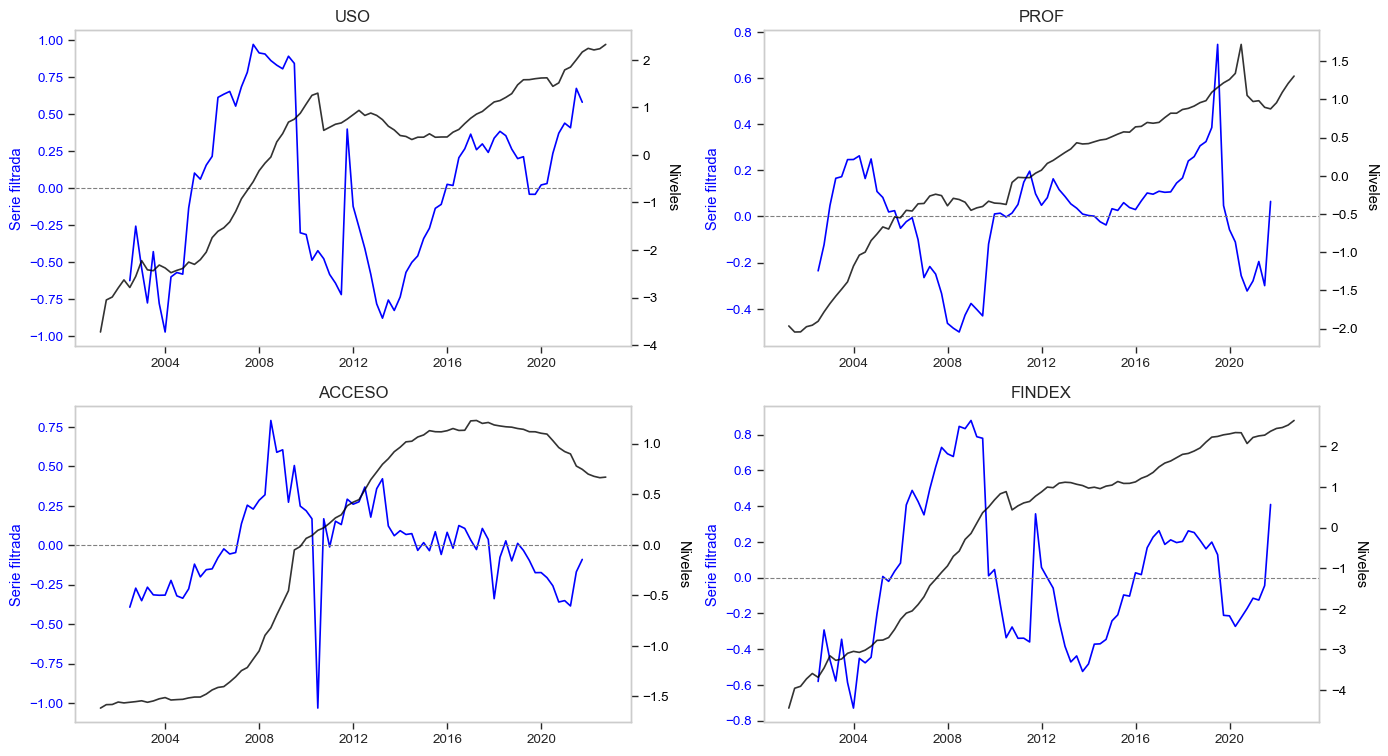

In [102]:
# ---------- Graficar en subplots (excluyendo la última variable) ----------
variables = cycle_df.columns[:-1]  # Tomar todas menos la última
n_vars = len(variables)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # Para poder indexar fácilmente

for i, col in enumerate(variables):
    ax1 = axes[i]
    
    # Ciclo (Hamilton)
    ax1.plot(cycle_df.index, cycle_df[col], color='blue')
    ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax1.set_title(f'{col}', fontsize=12)
    ax1.set_ylabel('Serie filtrada', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(False)

    # Segundo eje con la serie original
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[col], color='black', alpha=0.8)
    ax2.set_ylabel('Niveles', color='black', rotation=270, labelpad=15)
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.grid(False)

# Layout y ajustes
# fig.suptitle('Filtro de Hamilton - Ciclo y Serie Original (por dimensión)', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [41]:
cycle_df = cycle_df.dropna()
cycle_df

,USO,PROF,ACCESO,FINDEX,BANKCON
Fecha,,,,,
2002-06-30,-0.624814,-0.235416,-0.392794,-0.580947,-11.118217
2002-09-30,-0.256976,-0.122118,-0.272255,-0.292940,-38.654989
2002-12-31,-0.540518,0.047820,-0.351753,-0.460785,-45.306154
2003-03-31,-0.775294,0.165344,-0.266240,-0.578883,-29.895380
2003-06-30,-0.428904,0.172281,-0.314776,-0.345013,-8.249456
...,...,...,...,...,...
2020-09-30,0.370200,-0.322707,-0.359992,-0.172725,90.641880
2020-12-31,0.438208,-0.278985,-0.351340,-0.115442,68.326981
2021-03-31,0.407075,-0.195000,-0.385104,-0.125877,48.355229


### Esta data sera utilizada para introducirse en el Modelo

In [42]:
cycle_df.to_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/PCA/Datos Hamilton sin tendencia 2.xlsx", index=True)

## Gráfico de series conjuntas

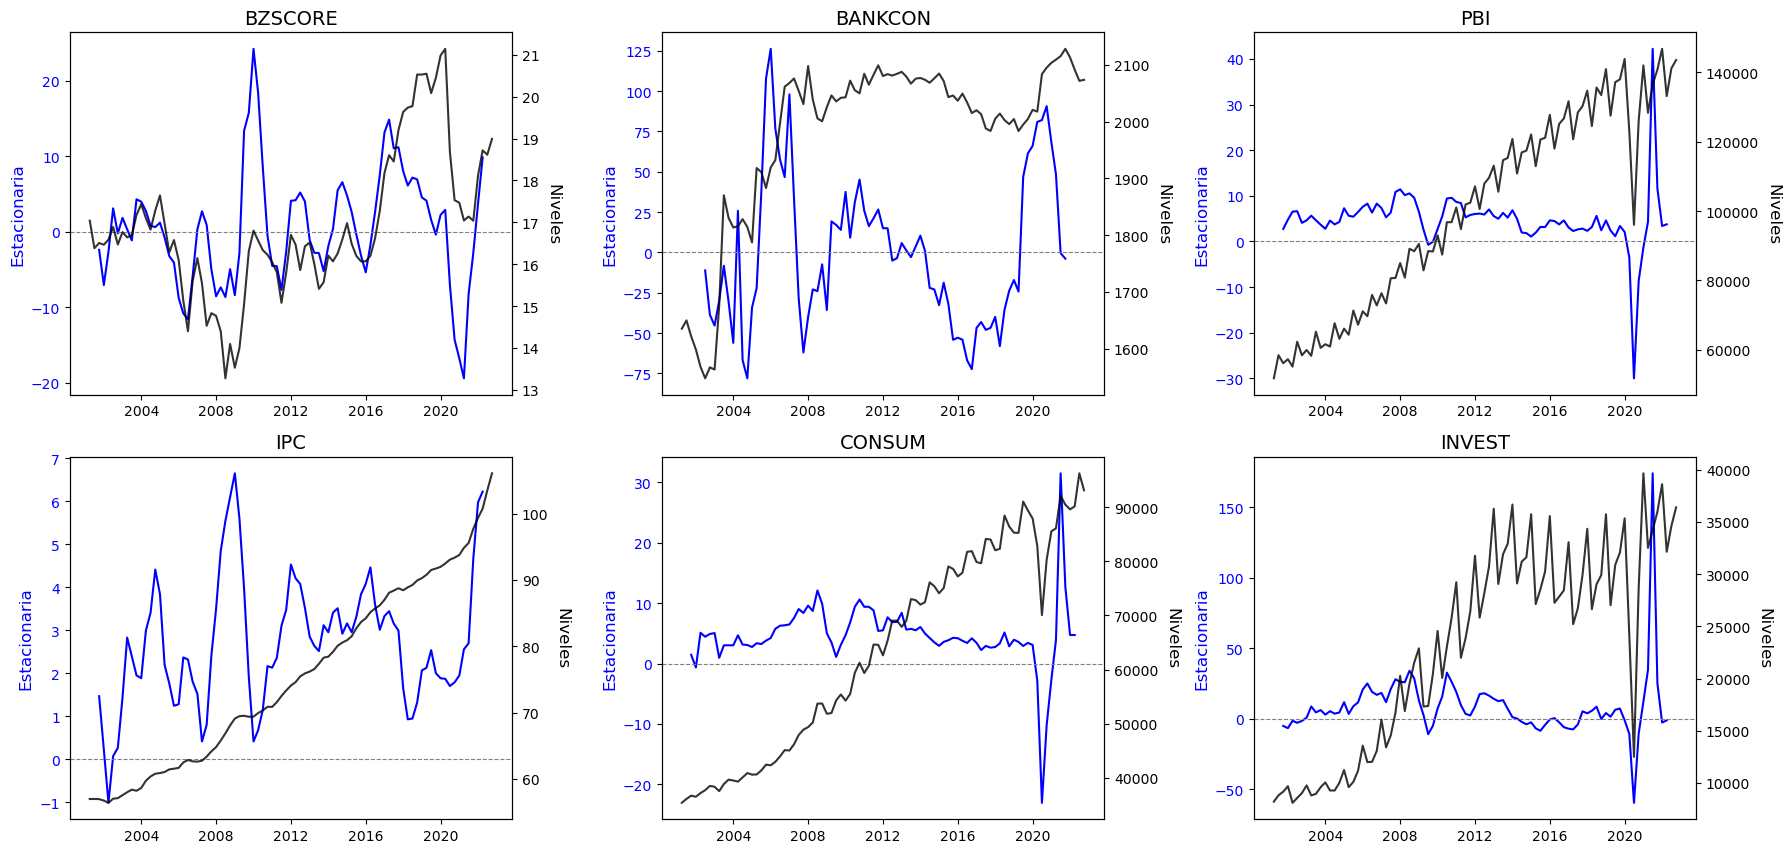

In [18]:
# Cargar datos desde Excel
file_path = "C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data nivel - var FH.xlsx"
df = pd.read_excel(file_path, sheet_name='Niveles', index_col=0, parse_dates=True)
cycle_df = pd.read_excel(file_path, sheet_name='Sin tendencia', index_col=0, parse_dates=True)

# Excluir las dos últimas columnas
df = df.iloc[:, 4:-2]
cycle_df = cycle_df.iloc[:, 4:-2]

# Seleccionar nombres de las variables
variables = cycle_df.columns
n_vars = len(variables)

# Crear figura
n_rows = (n_vars + 1) // 2  # ajustar número de filas para mostrar todas las variables
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()

for i, col in enumerate(variables):
    ax1 = axes[i]
    
    # Serie sin tendencia (Hamilton)
    ax1.plot(cycle_df.index, cycle_df[col], color='blue')
    ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax1.set_title(f'{col}', fontsize=14)
    ax1.set_ylabel('Estacionaria', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(False)

    # Segundo eje con la serie original
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[col], color='black', alpha=0.8)
    ax2.set_ylabel('Niveles', color='black', rotation=270, labelpad=15, fontsize=12)
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.grid(False)

# Ajustar layout
fig.tight_layout(rect=[0, 0, 1, 0.96])
# fig.suptitle('Filtro de Hamilton - Ciclo y Serie Original (por dimensión)', fontsize=14)
plt.show()

# Modelo VAR para hallar rezago óptimo

In [48]:
from statsmodels.tsa.api import VAR

In [64]:
file_path = "C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data final Hamilton 2.xlsx"
df = pd.read_excel(file_path)
df.set_index(df.columns[0], inplace=True)

In [65]:
# 2. Establecer datos, normalizar y pegar fecha
numeric_data = df.apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()
normalized = pd.DataFrame(
    scaler.fit_transform(numeric_data),  # Normalizar solo los valores
    columns=numeric_data.columns  # Mantener nombres de columnas
)
normalized.index = df.index
df_norm = normalized
df_norm

,USO,PROF,ACCESO,FINDEX,BZSCORE,BANKCON,PBI,IPC,CONSUM,INVEST,VIX,TERMS
Fecha,,,,,,,,,,,,
2002-06-30,-1.167712,-1.067653,-1.419031,-1.467833,0.341370,-0.240904,0.270700,-1.981282,-0.060623,-0.522418,0.363899,0.209673
2002-09-30,-0.480262,-0.553828,-0.983565,-0.740148,-0.093606,-0.837559,-0.115202,-1.836217,0.021821,-0.464018,1.948225,0.234382
2002-12-31,-1.010172,0.216873,-1.270764,-1.164230,0.175888,-0.981673,-0.030097,-0.951298,0.049239,-0.364756,1.217392,0.130016
2003-03-31,-1.448944,0.749865,-0.961833,-1.462618,-0.022928,-0.647759,0.121534,0.088322,-0.702417,-0.021807,1.332359,-0.572771
2003-06-30,-0.801577,0.781328,-1.137180,-0.871717,-0.216029,-0.178745,-0.028520,-0.237967,-0.323895,-0.203978,0.060881,-0.462623
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,0.691865,-1.463536,-1.300528,-0.436411,-1.944595,1.963987,-2.025687,-0.691690,-2.750821,-0.853875,0.789149,0.922810
2020-12-31,0.818965,-1.265250,-1.269273,-0.291678,-2.269542,1.480478,-0.922866,-0.573686,-1.372131,0.128028,0.964378,1.245818
2021-03-31,0.760781,-0.884361,-1.391248,-0.318044,-2.616018,1.047739,-0.075124,-0.113976,-0.158316,1.106998,0.925913,1.398103


In [60]:
df_norm.to_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data final Hamilton norm 2.xlsx", index=True)

In [67]:
model = VAR(df_norm)

# Seleccionar el rezago óptimo
lag_selection = model.select_order(maxlags=4)  # puedes ajustar el máximo según tus datos
print(lag_selection.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -10.79      -10.42   2.062e-05      -10.64
1      -20.14     -15.28*   1.878e-09      -18.20
2      -20.59      -11.25   1.589e-09      -16.87
3      -22.06      -8.235   8.586e-10      -16.54
4     -27.81*      -9.506  2.102e-11*     -20.51*
-------------------------------------------------


c:\Users\gabri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [45]:
from statsmodels.tsa.stattools import adfuller, kpss

In [48]:
# Ruta al archivo
file_path = "C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data final Hamilton norm 2.xlsx"

# Cargar datos
df = pd.read_excel(file_path, parse_dates=[0], index_col=0)

# Función para aplicar pruebas
def test_stationarity(series, name):
    print(f"\n--- Resultados para {name} ---")
    
    # ADF Test
    adf_result = adfuller(series.dropna())
    print(f"ADF test: p-valor = {adf_result[1]:.4f} -> {'Rechaza H0 (Estacionaria)' if adf_result[1] < 0.01 else 'No rechaza H0 (No estacionaria)'}")
    
    # KPSS Test
    try:
        kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
        print(f"KPSS test: p-valor = {kpss_result[1]:.4f} -> {'Rechaza H0 (No estacionaria)' if kpss_result[1] < 0.01 else 'No rechaza H0 (Estacionaria)'}")
    except:
        print("KPSS test falló (posiblemente serie muy corta)")

# Aplicar a cada columna
import warnings
warnings.filterwarnings("ignore")

for col in df.columns[:6]:
    test_stationarity(df[col], col)


--- Resultados para USO ---
ADF test: p-valor = 0.2596 -> No rechaza H0 (No estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para PROF ---
ADF test: p-valor = 0.0884 -> No rechaza H0 (No estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para ACCESO ---
ADF test: p-valor = 0.0904 -> No rechaza H0 (No estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para FINDEX ---
ADF test: p-valor = 0.0348 -> No rechaza H0 (No estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para BZSCORE ---
ADF test: p-valor = 0.0591 -> No rechaza H0 (No estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para BANKCON ---
ADF test: p-valor = 0.0395 -> No rechaza H0 (No estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)


# Gráfico de variables en niveles y variaciones

In [3]:
# Leer hojas de niveles y variaciones
ruta = "C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data nivel - var FH.xlsx"
niveles = pd.read_excel(ruta, sheet_name="Niveles", parse_dates=[0])
variaciones = pd.read_excel(ruta, sheet_name="Sin tendencia", parse_dates=[0])

# Asegurar que el índice sea la fecha
niveles.set_index(niveles.columns[0], inplace=True)
variaciones.set_index(variaciones.columns[0], inplace=True)

In [4]:
import matplotlib.ticker as ticker
import seaborn as sns

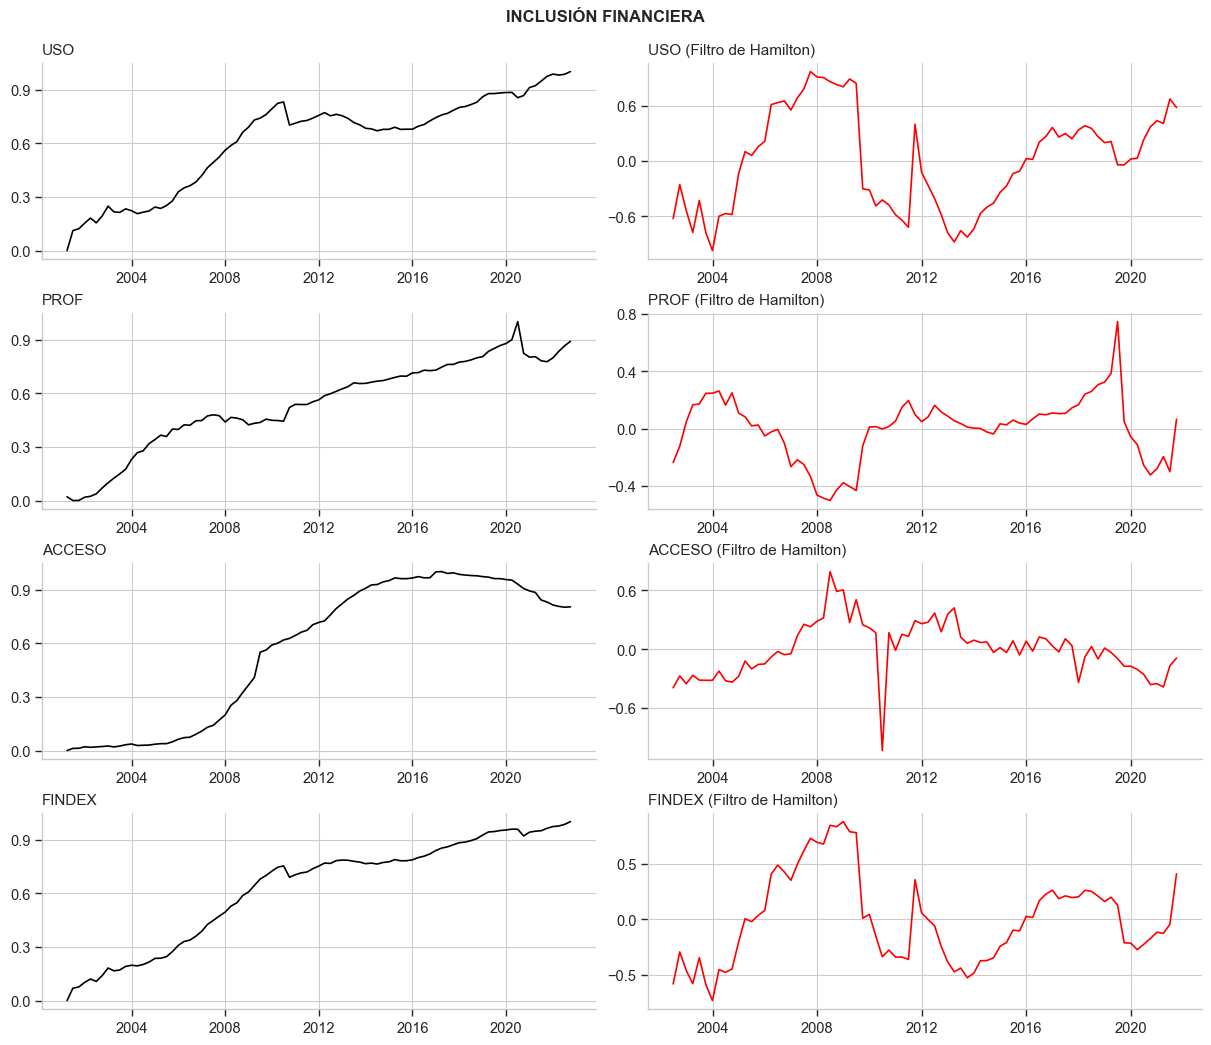

In [5]:
# Estilo sobrio tipo paper
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Definir bloques y variables
bloques = {
    "Inclusión financiera": ["USO", "PROF", "ACCESO", "FINDEX"],
}

# Graficar cada bloque
for nombre_bloque, variables in bloques.items():
    n = len(variables)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 2.5 * n), constrained_layout=True)

    if n == 1:
        axes = [axes]  # Para mantener compatibilidad cuando n=1

    for i, var in enumerate(variables):
        # Nivel
        axes[i][0].plot(niveles.index, niveles[var], color='black', linewidth=1.2)
        axes[i][0].set_title(f"{var}", loc='left', fontsize=11)
        axes[i][0].tick_params(axis='x', labelrotation=0)
        axes[i][0].spines[['top', 'right']].set_visible(False)

        # Variación
        axes[i][1].plot(variaciones.index, variaciones[var], color='red', linewidth=1.2)
        axes[i][1].set_title(f"{var} (Filtro de Hamilton)", loc='left', fontsize=11)
        axes[i][1].tick_params(axis='x', labelrotation=0)
        axes[i][1].spines[['top', 'right']].set_visible(False)

        # Mejorar legibilidad en eje y
        for ax in axes[i]:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

    # Título del bloque
   # Título del bloque
    fig.suptitle(nombre_bloque.upper(), fontsize=12, fontweight='bold', y=1.03)

plt.show()


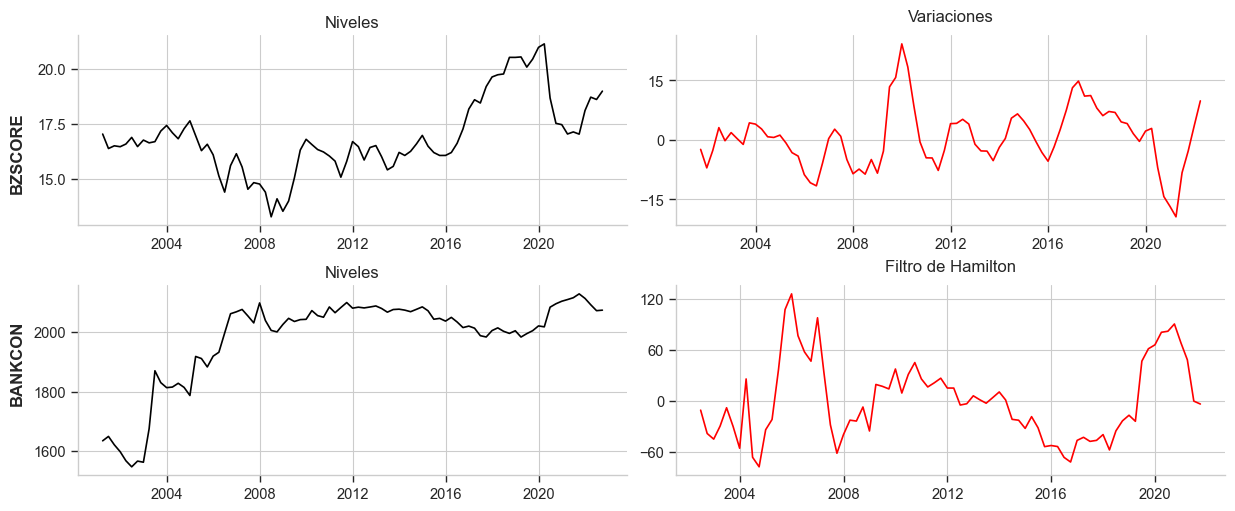

In [34]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Variables
variables = ["BZSCORE", "BANKCON"]
n = len(variables)

# Crear figura y ejes
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 2.5 * n), constrained_layout=True)

# Asegurar que axes sea indexable como lista de listas
if n == 1:
    axes = [axes]

# Título general de toda la figura
# fig.suptitle("BLOQUE BANCARIO", fontsize=12, fontweight='bold', y=1.03)

# Recorrer variables
for i, var in enumerate(variables):
    # === Subtítulo general de la fila, a la izquierda (rotado 90°) ===
    # Calcular la posición vertical centrada entre los dos subgráficos
    y_center = (axes[i][0].get_position().y0 + axes[i][0].get_position().y1) / 2
    fig.text(-0.01, y_center, var, rotation=90, va='center', ha='center', fontsize=12, fontweight='bold')

    # === Columna 1: Niveles ===
    axes[i][0].plot(niveles.index, niveles[var], color='black', linewidth=1.2)
    axes[i][0].set_title("Niveles", loc='center', fontsize=12)
    axes[i][0].tick_params(axis='x', labelrotation=0)
    axes[i][0].spines[['top', 'right']].set_visible(False)
    axes[i][0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

    # === Columna 2: Variaciones o Filtro de Hamilton ===
    axes[i][1].plot(variaciones.index, variaciones[var], color='red', linewidth=1.2)

    # Título del segundo gráfico según variable
    right_title = "Filtro de Hamilton" if var == "BANKCON" else "Variaciones"
    axes[i][1].set_title(right_title, loc='center', fontsize=12, pad=10)

    axes[i][1].tick_params(axis='x', labelrotation=0)
    axes[i][1].spines[['top', 'right']].set_visible(False)
    axes[i][1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

plt.show()


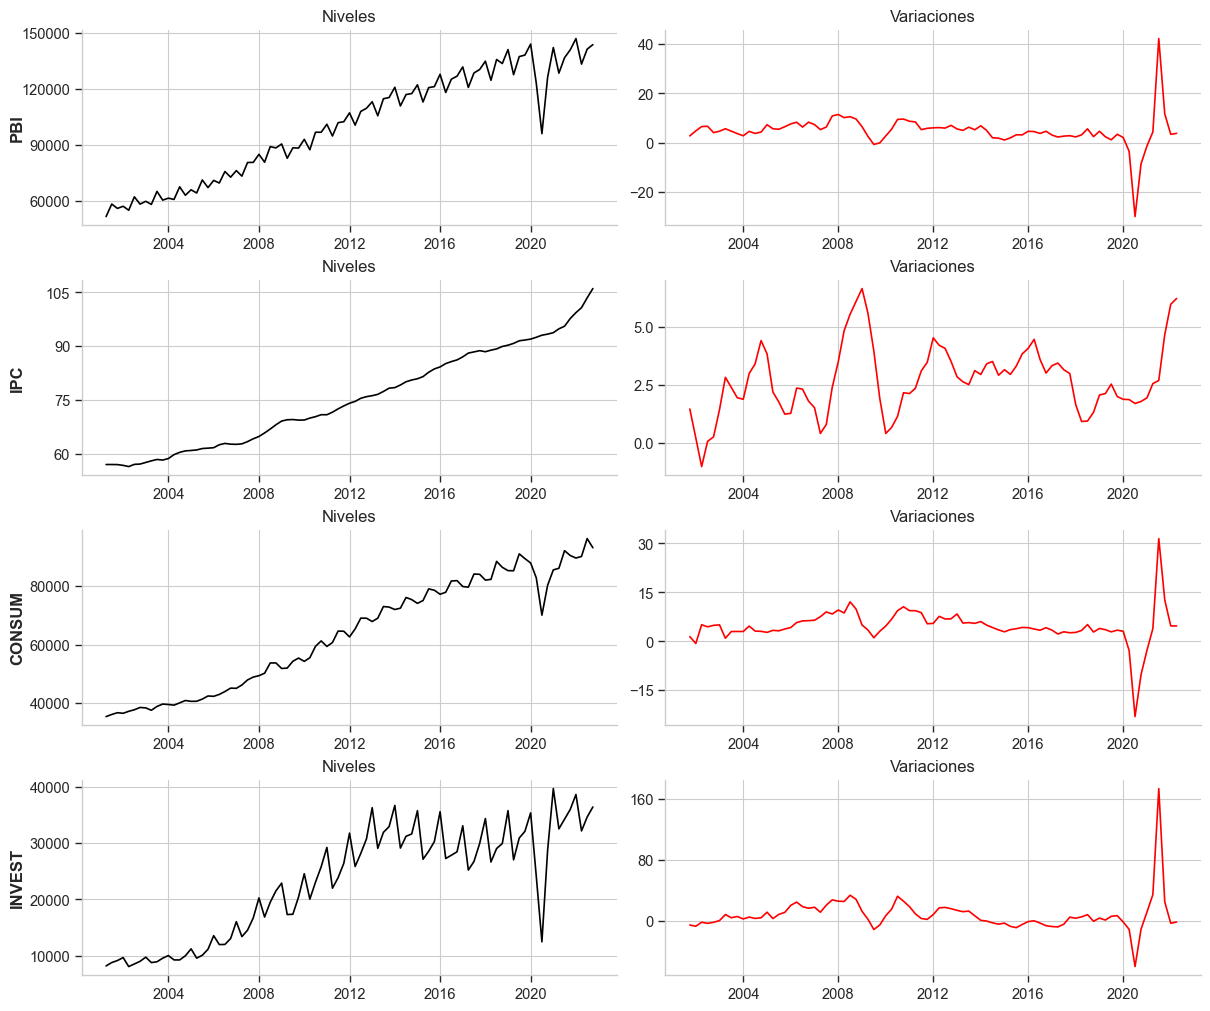

In [35]:
# Estilo sobrio tipo paper
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Definir bloques y variables
bloques = {
    "Bloque doméstico": ["PBI", "IPC", "CONSUM", "INVEST"],
}

# Graficar cada bloque
for nombre_bloque, variables in bloques.items():
    n = len(variables)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 2.5 * n), constrained_layout=True)

    if n == 1:
        axes = [axes]  # Para mantener compatibilidad cuando n=1

    for i, var in enumerate(variables):
        # === Columna 1: Niveles ===
        axes[i][0].plot(niveles.index, niveles[var], color='black', linewidth=1.2)
        axes[i][0].set_title("Niveles", loc='center', fontsize=12)
        axes[i][0].tick_params(axis='x', labelrotation=0)
        axes[i][0].spines[['top', 'right']].set_visible(False)
        axes[i][0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

        # Subtítulo dentro del gráfico (nombre de la variable en el eje Y)
        axes[i][0].text(-0.12, 0.5, var, transform=axes[i][0].transAxes,
                        rotation=90, va='center', ha='center', fontsize=12, fontweight='bold')

        # === Columna 2: Variaciones ===
        axes[i][1].plot(variaciones.index, variaciones[var], color='red', linewidth=1.2)
        axes[i][1].set_title("Variaciones", loc='center', fontsize=12)
        axes[i][1].tick_params(axis='x', labelrotation=0)
        axes[i][1].spines[['top', 'right']].set_visible(False)
        axes[i][1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

    # Título del bloque
    # fig.suptitle(nombre_bloque.upper(), fontsize=12, fontweight='bold', y=1.03)
    plt.show()



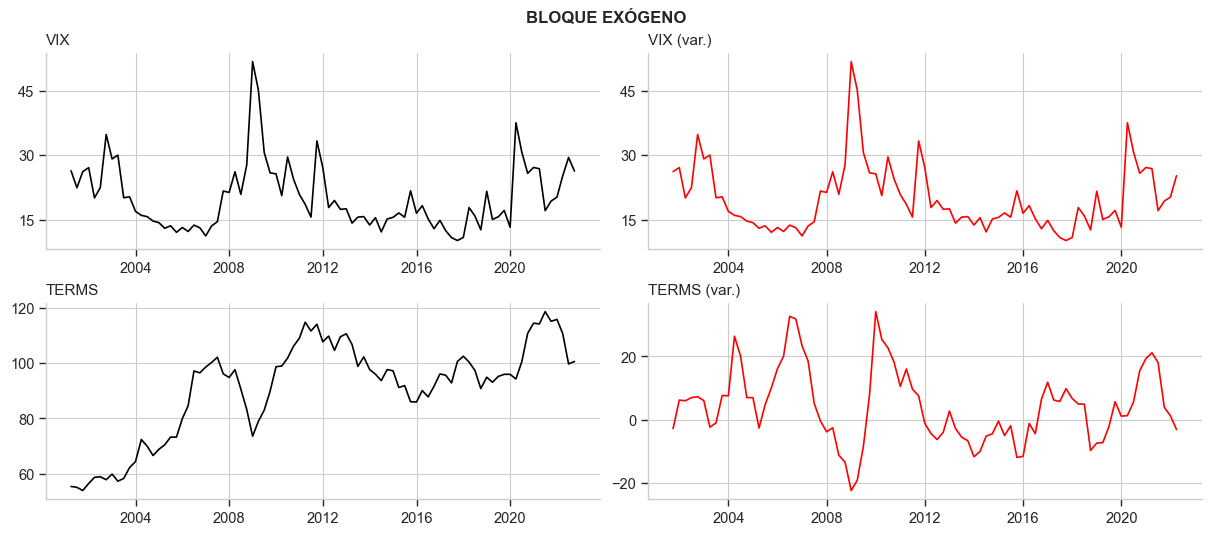

In [66]:
# Estilo sobrio tipo paper
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Definir bloques y variables
bloques = {
    "Bloque exógeno": ["VIX", "TERMS"]
}

# Graficar cada bloque
for nombre_bloque, variables in bloques.items():
    n = len(variables)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 2.5 * n), constrained_layout=True)

    if n == 1:
        axes = [axes]  # Para mantener compatibilidad cuando n=1

    for i, var in enumerate(variables):
        # Nivel
        axes[i][0].plot(niveles.index, niveles[var], color='black', linewidth=1.2)
        axes[i][0].set_title(f"{var}", loc='left', fontsize=11)
        axes[i][0].tick_params(axis='x', labelrotation=0)
        axes[i][0].spines[['top', 'right']].set_visible(False)

        # Variación
        axes[i][1].plot(variaciones.index, variaciones[var], color='red', linewidth=1.2)
        axes[i][1].set_title(f"{var} (var.)", loc='left', fontsize=11)
        axes[i][1].tick_params(axis='x', labelrotation=0)
        axes[i][1].spines[['top', 'right']].set_visible(False)

        # Mejorar legibilidad en eje y
        for ax in axes[i]:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

    # Título del bloque
    fig.suptitle(nombre_bloque.upper(), fontsize=12, fontweight='bold', y=1.04)
    plt.show()


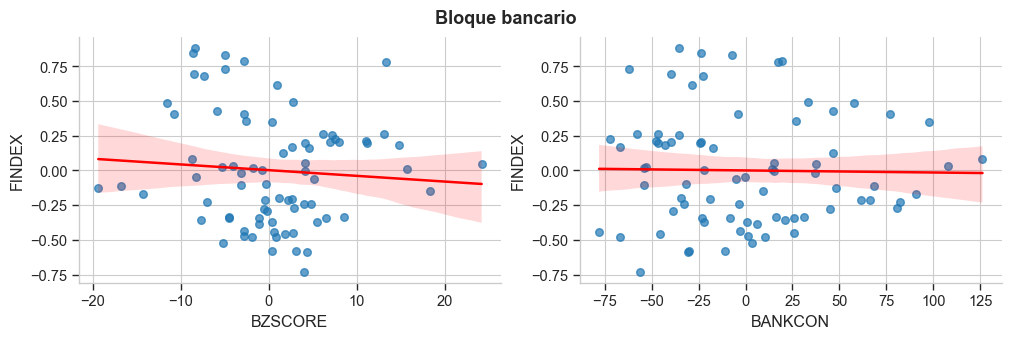

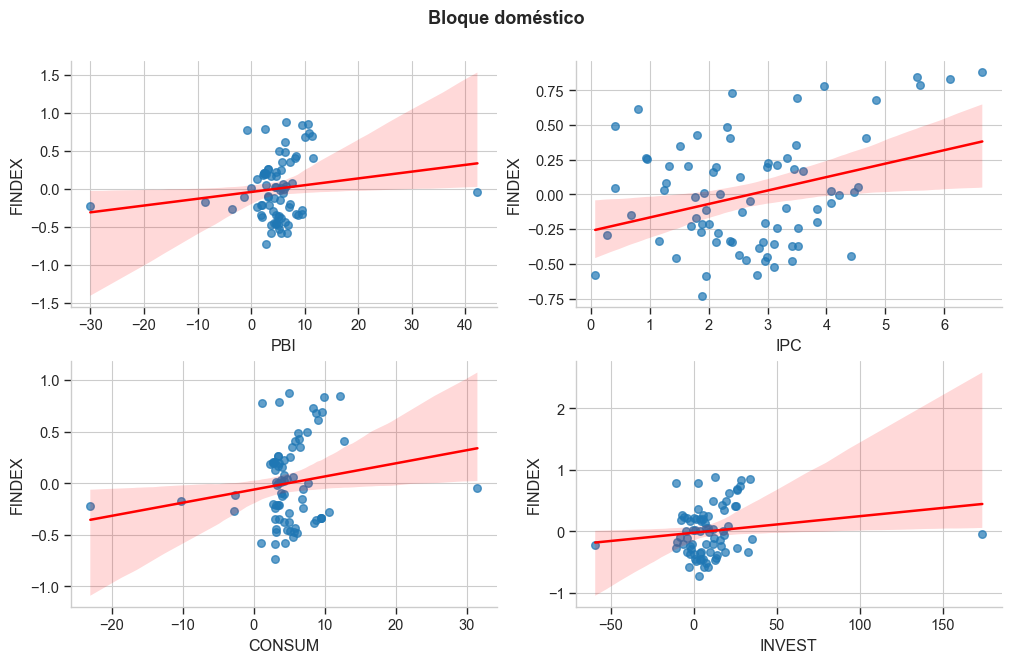

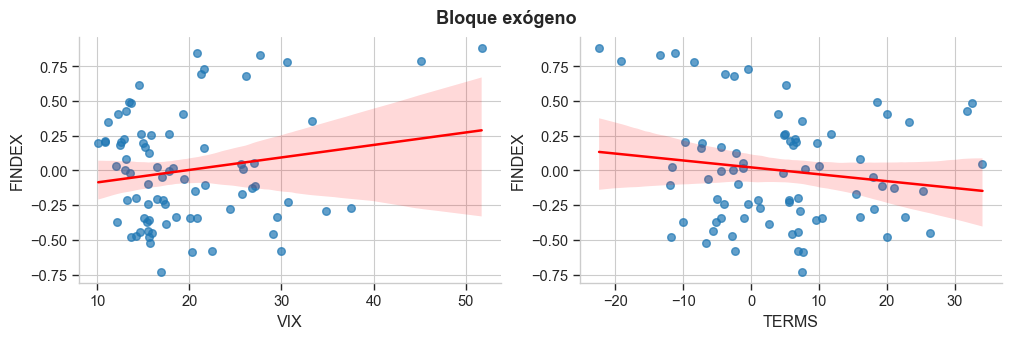

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo sobrio
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Definición de bloques
bloques = {
    "Bloque bancario": ["BZSCORE", "BANKCON"],
    "Bloque doméstico": ["PBI", "IPC", "CONSUM", "INVEST"],
    "Bloque exógeno": ["VIX", "TERMS"]
}

# Variable dependiente
var_ref = "FINDEX"

# Gráfico por bloque
for nombre_bloque, variables in bloques.items():
    n = len(variables)
    ncols = 2
    nrows = (n + 1) // ncols  # número de filas necesarias
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 3 * nrows), constrained_layout=True)
    axes = axes.flatten()  # para indexar fácilmente

    for i, var in enumerate(variables):
        sns.regplot(x=variaciones[var], y=variaciones[var_ref], ax=axes[i],
                    scatter_kws={'s': 30, 'alpha': 0.7}, line_kws={'color': 'red'})
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(var_ref)
        # axes[i].set_title(f'{var_ref} vs {var}', loc='left', fontsize=11)
        axes[i].spines[['top', 'right']].set_visible(False)

    # Eliminar ejes vacíos si los hay
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Título del bloque
    fig.suptitle(f"{nombre_bloque}", fontsize=13, fontweight='bold', y=1.08)
    plt.show()



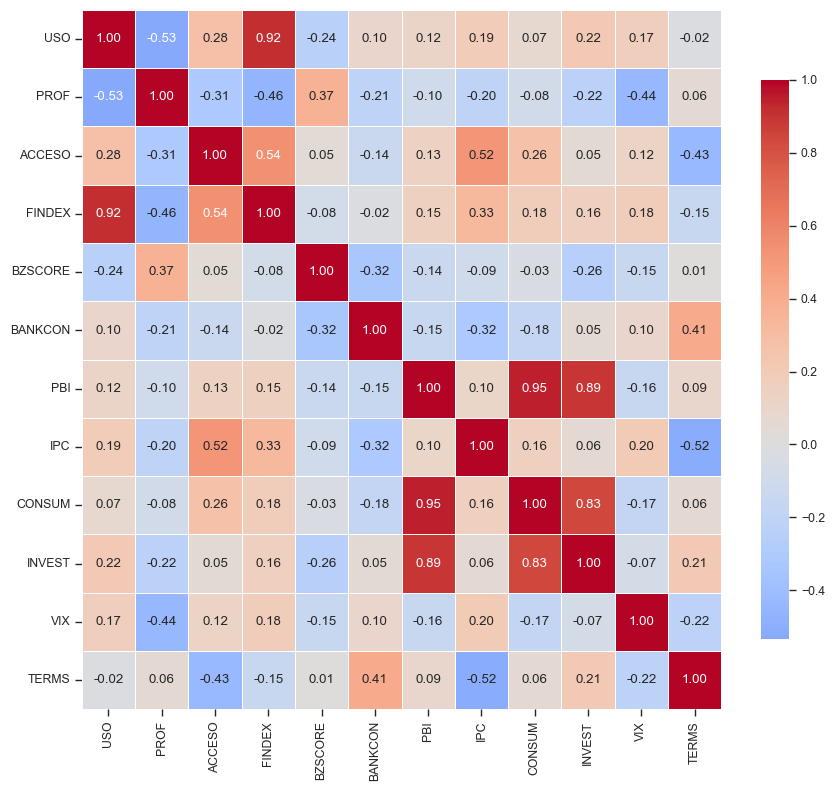

In [44]:
# Estilo sobrio
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1)

# Calcular matriz de correlaciones
matriz_corr = variaciones.corr()

# Crear mapa de calor
plt.figure(figsize=(9, 8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.tight_layout()
plt.show()


# Transformamos algunos datos para añadir mas indicadores de IF

In [28]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data poblacion.xlsx")

# 2. Convertir la columna 'Año' a un índice tipo datetime con frecuencia anual
df['Fecha'] = pd.to_datetime(df['year'], format='%Y')
df = df.set_index('Fecha')
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2000-01-01 to 2023-01-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       24 non-null     int64
 1   poblation  24 non-null     int64
dtypes: int64(2)
memory usage: 576.0 bytes


In [29]:
# Asegurarnos que 'year' es numérico
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Crear fechas con final de año (31 de diciembre)
df['Fecha'] = pd.to_datetime(df['year'], format='%Y') + pd.offsets.YearEnd(0)
df = df.set_index('Fecha')

# Renombrar columna si se llama 'poblation' mal escrita
df.rename(columns={'poblation': 'poblacion'}, inplace=True)

# Creamos columna original y reindexamos a trimestral
df_original = df[['poblacion']].copy()
df_trimestral = df_original.resample('Q').asfreq()

# Interpolamos
df_trimestral['poblacion_estimada'] = df_trimestral['poblacion'].interpolate(method='linear')

# Ahora tenemos ambas columnas
# La columna 'poblacion' tiene solo los valores anuales
# La columna 'poblacion_estimada' tiene todos (anuales + trimestrales interpolados)
df_resultado = df_trimestral.reset_index()
df_resultado 

C:\Users\gabri\AppData\Local\Temp\ipykernel_18956\1209565367.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_trimestral = df_original.resample('Q').asfreq()


,Fecha,poblacion,poblacion_estimada
0,2000-12-31,14889892.0,14889892.0
1,2001-03-31,NaN,14964028.5
2,2001-06-30,NaN,15038165.0
3,2001-09-30,NaN,15112301.5
4,2001-12-31,15186438.0,15186438.0
...,...,...,...
88,2022-12-31,21854191.0,21854191.0
89,2023-03-31,NaN,21903177.0
90,2023-06-30,NaN,21952163.0
91,2023-09-30,NaN,22001149.0


In [30]:
df_resultado.to_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data poblacion int.xlsx", index=True)